Using Theano backend.


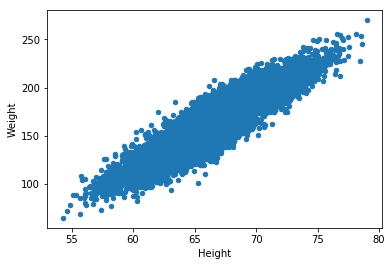

In [5]:
import pandas as pd
np = pd.np
import matplotlib
%matplotlib inline
df = pd.read_csv('../shared-resources/heights_weights_genders.csv')
df.plot.scatter(x='Height', y='Weight')
# !pip install keras
import keras

In [6]:
X = df[['Height', 'Weight']].values
y = (df.Gender == 'Female').astype(int)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### keras documentation:

1. [activation functions](https://keras.io/activations/)  
2. [loss functions](https://keras.io/losses/)  
3. [optimization algorithms](https://keras.io/optimizers/)  

In [9]:
from keras.models import Sequential
from keras.layers import Activation, Dense

model = Sequential()
model.add(Dense(1, input_shape=X.shape[1:]))  # model.layers[0].get_weights()[:].shape: [(2,),]
model.add(Activation('linear'))  # relu, softmax, sigmoid
model.compile(loss='mean_squared_error', optimizer='sgd') 
# notice that there are 2 random weights and a bias (initialized to zero), just like we had before
print(model.layers[0].get_weights())
    
    

[array([[-0.59264463],
       [ 1.07693863]], dtype=float32), array([ 0.], dtype=float32)]


In [12]:
model.fit(X, y, batch_size=100)

Epoch 1/10
10000/10000 [==============================] - 0s - loss: 0.3418     
Epoch 2/10
10000/10000 [==============================] - 0s - loss: 0.3107     
Epoch 3/10
10000/10000 [==============================] - 0s - loss: 0.2880     
Epoch 4/10
10000/10000 [==============================] - 0s - loss: 0.2679     
Epoch 5/10
10000/10000 [==============================] - 0s - loss: 0.2501     
Epoch 6/10
10000/10000 [==============================] - 0s - loss: 0.2345     
Epoch 7/10
10000/10000 [==============================] - 0s - loss: 0.2207     
Epoch 8/10
10000/10000 [==============================] - ETA: 0s - loss: 0.209 - 0s - loss: 0.2085     
Epoch 9/10
10000/10000 [==============================] - 0s - loss: 0.1977     - ETA: 0s - loss: 0.19
Epoch 10/10
10000/10000 [==============================] - 0s - loss: 0.1882     


In [14]:
ypred = model.predict(X)
print(ypred.shape)
print(y.shape)
mad = np.abs(ypred - y.values.reshape(len(y), 1)).mean()
print(mad)

(10000, 1)
(10000,)
0.41454099392


In [48]:
def logistic(x):
    return 1./(1-np.exp(x))

In [49]:
# Your turn: compute RMSE and compare to your "Pure Python" accuracy
model2 = Sequential()
model2.add(Dense(1, input_shape=X.shape[1:]))  # model.layers[0].get_weights()[:].shape: [(2,),]
model2.add(Activation('sigmoid'))  # relu, softmax, sigmoid
model2.compile(loss='mean_absolute_error', optimizer='sgd') 
# notice that there are 2 random weights and a bias (initialized to zero), just like we had before
print(model2.layers[0].get_weights())

[array([[-0.08154366],
       [ 0.88640893]], dtype=float32), array([ 0.], dtype=float32)]


In [50]:
model2.fit(X, y, batch_size=100)

Epoch 1/10
10000/10000 [==============================] - 0s - loss: 0.5238     
Epoch 2/10
10000/10000 [==============================] - 0s - loss: 0.5224     
Epoch 3/10
10000/10000 [==============================] - 0s - loss: 0.5210     
Epoch 4/10
10000/10000 [==============================] - 0s - loss: 0.5196     
Epoch 5/10
10000/10000 [==============================] - 0s - loss: 0.5181     
Epoch 6/10
10000/10000 [==============================] - 0s - loss: 0.5166     - ETA: 0s - loss: 0.
Epoch 7/10
10000/10000 [==============================] - 0s - loss: 0.5151     
Epoch 8/10
10000/10000 [==============================] - 0s - loss: 0.5135     
Epoch 9/10
10000/10000 [==============================] - 0s - loss: 0.5119     
Epoch 10/10
10000/10000 [==============================] - 0s - loss: 0.5103     


In [54]:
ypred2 = model2.predict(X)
ypred2 = (ypred2 > .5).astype(int)
np.abs(ypred2 - y.values.reshape(len(y), 1)).mean()

0.50029999999999997

In [22]:
# Your turn: plot your results
mask = df.Gender == 'Female'
ax = df[mask].plot(kind='scatter', alpha=.5, x='squared_height', y='Weight', c='red')
df[~mask].plot(ax=ax, alpha=.1, kind='scatter', x='square_height', y='Weight', c='green')

KeyError: 'square_height'

In [ ]:
# can you think of a better NN architecture?
# Your turn: add another neuron, do you get better accuracy if it's on the same layer (parallel) or on a second layer (in series)
# Your turn: now you have a "budget" of 3 neurons... give it a go!